In [1]:
"""
GravMag: Calculate the analytic signal of a total field anomaly using FFT
"""
import matplotlib.pyplot as plt
from geoist import gridder
from geoist.inversion import geometry
from geoist.pfm import prism, pftrans, giutils
from geoist.vis import giplt

In [2]:
#模型参数设置
model = [geometry.Prism(-100, 100, -100, 100, 0, 2000, {'magnetization': 10})]
area = (-5000, 5000, -5000, 5000)
shape = (100, 100)
z0 = -500
#模型设置
x, y, z = gridder.regular(area, shape, z=z0)
inc, dec = -30, 0

In [3]:
#正演及添加噪声
tf = giutils.contaminate(prism.tf(x, y, z, model, inc, dec), 0.001,
                       percent=True)

In [4]:
#转换gz to SI units so that the result is also in SI
total_grad_amp = pftrans.tga(x, y, giutils.nt2si(tf), shape)

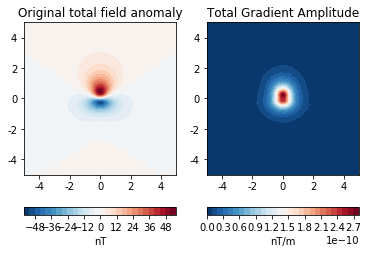

In [5]:
#画图
plt.figure()
plt.subplot(1, 2, 1)
plt.title("Original total field anomaly")
plt.axis('scaled')
giplt.contourf(y, x, tf, shape, 30, cmap=plt.cm.RdBu_r)
plt.colorbar(orientation='horizontal').set_label('nT')
giplt.m2km()
plt.subplot(1, 2, 2)
plt.title("Total Gradient Amplitude")
plt.axis('scaled')
giplt.contourf(y, x, total_grad_amp, shape, 30, cmap=plt.cm.RdBu_r)
plt.colorbar(orientation='horizontal').set_label('nT/m')
giplt.m2km()
plt.show()